# Import dataset

In [17]:
import pandas as pd
data = pd.read_csv('D:/Projects/End-to-End/crawl/data/data_raw.csv', delimiter=';')
data.head(10)

,Unnamed: 0,PRECTOTCORR,RH2M,QV2M,PS,WS2M
0,20000101,0.00,83.00,16.85,100.32,1.68
1,20000102,0.03,80.69,16.60,100.32,1.48
2,20000103,1.61,81.94,16.78,100.31,1.30
3,20000104,1.07,83.00,17.15,100.30,1.22
4,20000105,0.00,83.81,17.52,100.40,1.55
5,20000106,0.16,87.31,17.33,100.43,1.16
6,20000107,0.04,86.69,17.64,100.44,1.29
7,20000108,0.00,79.19,16.30,100.45,0.68
8,20000109,0.00,80.69,15.44,100.46,1.30
9,20000110,0.02,80.12,16.17,100.38,1.16


In [18]:
print("So dong cua du lieu:", data.shape[0])

So dong cua du lieu: 8729


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8729 entries, 0 to 8728
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   8729 non-null   int64  
 1   PRECTOTCORR  8729 non-null   float64
 2   RH2M         8729 non-null   float64
 3   QV2M         8729 non-null   float64
 4   PS           8729 non-null   float64
 5   WS2M         8729 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 409.3 KB


In [6]:
#Check for missing data
print(data.isnull().sum().sort_values(ascending=False))

DATE           0
T2M            0
QV2M           0
PRECTOTCORR    0
RH2M           0
PS             0
WS2M           0
dtype: int64


# PREPARE DATASET FOR TRAINING 

In [7]:
#Importing Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [8]:
df = data.drop(["DATE"],axis=1)

In [30]:
X =df[["PRECTOTCORR", "QV2M", "WS2M","RH2M"]]
y =df["T2M"]

In [10]:
#Perform Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [11]:
#Splitting the data into train and test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_sc,y , test_size=0.1, random_state=101,shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=2/9, random_state=1)

#**PREPARE FOR TRAINING**

##Plots

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

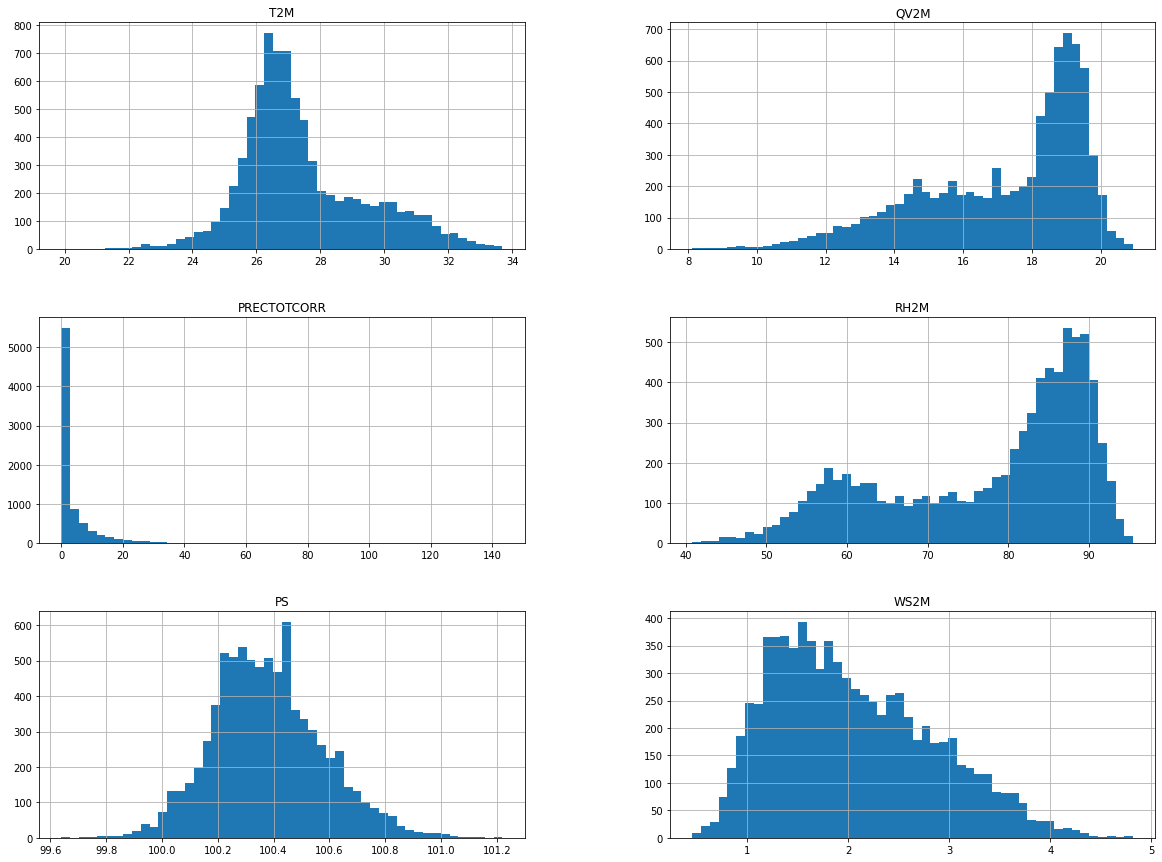

In [13]:
# Histogram
data.hist(bins=50, figsize=(20,15))
plt.show()

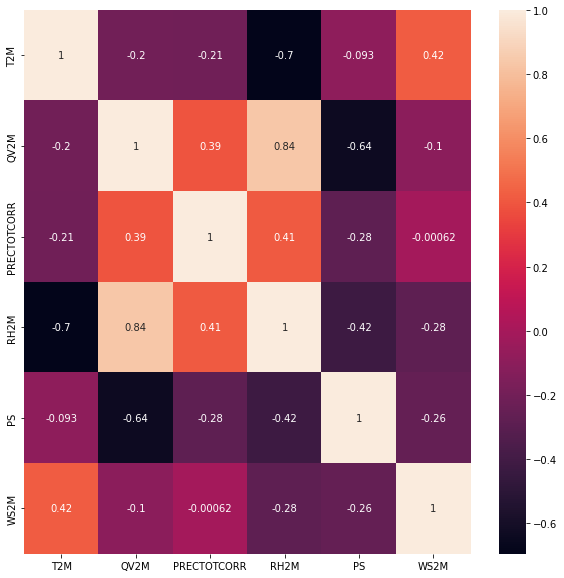

In [14]:
# Heatmap
corr_matrix = data.corr()
plt.figure(figsize = (10,10))
sns_plot=sns.heatmap(corr_matrix,annot=True)
plt.show()

Nhận xét: T2M ~ PRECTOTCORR, QV2M, RH2M, WS2M

In [15]:
data=data.drop(['PS'], axis=1)

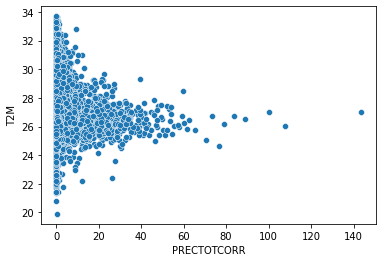

In [16]:
x = data["PRECTOTCORR"]
y = data["T2M"]
data_visualize = pd.DataFrame({"PRECTOTCORR":x,"T2M":y})
sns.scatterplot(data=data_visualize, x="PRECTOTCORR", y="T2M")

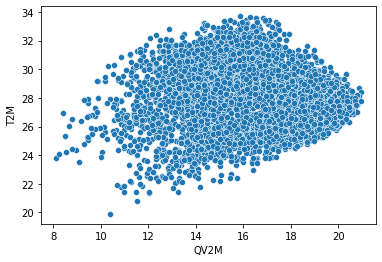

In [17]:
x = data["QV2M"]
y = data["T2M"]
data_visualize = pd.DataFrame({"QV2M": x, "T2M": y})
sns.scatterplot(data=data_visualize, x="QV2M", y="T2M")

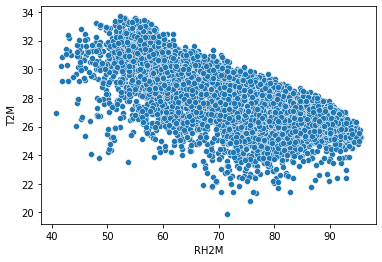

In [18]:
x = data["RH2M"]
y = data["T2M"]
data_visualize = pd.DataFrame({"RH2M": x, "T2M": y})
sns.scatterplot(data=data_visualize, x="RH2M", y="T2M")


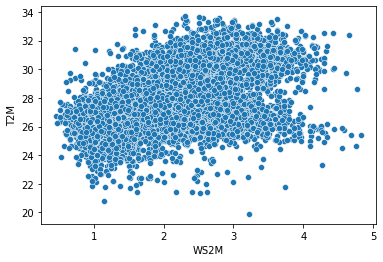

In [19]:
x = data["WS2M"]
y = data["T2M"]
data_visualize = pd.DataFrame({"WS2M": x, "T2M": y})
sns.scatterplot(data=data_visualize, x="WS2M", y="T2M")

#ĐÁNH GIÁ TỔNG QUAN CÁC MÔ HÌNH

In [24]:
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score, mean_squared_error
from time import time
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [24]:
regressors = [
    KNeighborsRegressor(),
    GradientBoostingRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor()
]

In [25]:
head = 10
for model in regressors[:head]:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    y_pred = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean square error(MSE):", mean_squared_error(y_test, y_pred))
    print("\tRoot mean square error(RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("\tMean absolute error(MAE):", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()

KNeighborsRegressor()
	Training time: 0.006s
	Prediction time: 0.011s
	Explained variance: 0.965577099339151
	Mean square error(MSE): 0.13487513930348272
	Root mean square error(RMSE): 0.36725350822488095
	Mean absolute error(MAE): 0.2536094527363184
	R2 score: 0.965312308183441

GradientBoostingRegressor()
	Training time: 0.520s
	Prediction time: 0.522s
	Explained variance: 0.9830351742230377
	Mean square error(MSE): 0.0660780679044718
	Root mean square error(RMSE): 0.2570565461225833
	Mean absolute error(MAE): 0.16039942307244584
	R2 score: 0.9830057958261194

LinearRegression()
	Training time: 0.016s
	Prediction time: 0.016s
	Explained variance: 0.9788706589679609
	Mean square error(MSE): 0.08215841375945566
	Root mean square error(RMSE): 0.2866328902262538
	Mean absolute error(MAE): 0.21157282744904438
	R2 score: 0.9788701924510135

Lasso()
	Training time: 0.002s
	Prediction time: 0.003s
	Explained variance: 0.21226312444438455
	Mean square error(MSE): 3.0638423595713555
	Root mean

Vậy ta lựa chọn các mô hình Linear Regression và Ridge tiến hành tinh chỉnh siêu tham số.

## RIDGE REGRESSION

### RidgeCV

In [20]:
#Splitting the data into train and test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_sc,y , test_size=0.1, random_state=101,shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=2/9, random_state=1)

In [21]:
alphas = 10**np.linspace(10,-2,100)*0.5

In [ ]:
ridge = Ridge(normalize=True)
coefs = []

for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    
np.shape(coefs)

In [29]:
features = data[["PRECTOTCORR", "QV2M", "WS2M","RH2M", "PS"]]

KeyError: ignored

KeyError: ignored

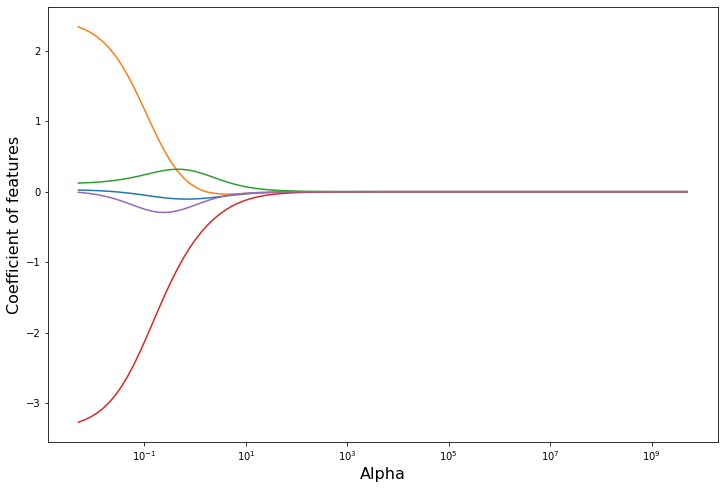

In [28]:
plt.figure(figsize= (12, 8))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())
plt.axis('tight')
plt.xlabel('Alpha', fontsize = 16)
plt.ylabel('Coefficient of features', fontsize=16)
features = data[["PRECTOTCORR", "QV2M", "WS2M","RH2M", "PS"]]
plt.legend(features)
plt.title('Ridge coefficients khi thay đổi hệ số Alpha', fontsize=16)

In [ ]:
from sklearn.linear_model import Ridge, RidgeCV
ridgecv = RidgeCV(alphas = alphas, scoring = 'neg_mean_squared_error', normalize = False)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

Lambda = 0.005

In [ ]:
ridge1 = Ridge(alpha = ridgecv.alpha_, normalize = False)
ridge1.fit(X_train, y_train)

In [ ]:
print("\tRoot mean square error(RMSE):", np.sqrt(mean_squared_error(y_test, ridge1.predict(X_test))))
print("\tR2 score:", r2_score(y_test, ridge1.predict(X_test)))

In [ ]:
print(pd.Series(ridge1.coef_, index = X.columns))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.distplot(y_test- ridge1.predict(X_test))

In [ ]:
ridge2 = ridge1.fit(X, y)

In [ ]:
print("\tRoot mean square error(RMSE):", np.sqrt(mean_squared_error(y_test, ridge2.predict(X_test))))
print("\tR2 score:", r2_score(y_test, ridge2.predict(X_test)))

In [ ]:
print(pd.Series(ridge2.coef_, index = X.columns))

### GridsearchCV

In [ ]:
#Import Libraries
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
#define parameters

param = {
    'alpha': alphas,
    'fit_intercept':[True,False],
    'normalize':[True,False],
'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
       }

In [ ]:
from sklearn.model_selection import RepeatedKFold
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [ ]:
#define model
model = Ridge()

# define search
search = GridSearchCV(model, param, scoring='r2', n_jobs=-1, cv=cv)

# execute search
result = search.fit(X, y)

# summarize result
print('Best Hyperparameters: %s' % result.best_params_)

In [ ]:
model = Ridge(alpha=0.01155064850041579,fit_intercept= True, normalize = False, solver ='sag')
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print("\t R2 score:", r2_score(y_test,y_pred))
print("\tRoot mean square error(RMSE):", np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
print(pd.Series(model.coef_, index = X.columns))

### Visualizing

In [ ]:
import seaborn as sns
sns.distplot(y_test-prediction_ridge)

In [ ]:
features = data[["PRECTOTCORR", "QV2M", "WS2M","RH2M"]]


In [ ]:
import matplotlib.pyplot as plt

# Thay đổi alphas từ 1 --> 100
n_alphas = 200
alphas = 1/np.logspace(1, -2, n_alphas)
coefs = []

# Huấn luyện model khi alpha thay đổi.
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)

# Hiển thị kết quả mô hình cho các hệ số alpha
plt.figure(figsize= (12, 8))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())
plt.xlabel('alpha', fontsize=16)
plt.ylabel('coefficient of features', fontsize=16)
plt.legend(features)
plt.title('Ridge coefficients khi thay đổi hệ số alpha', fontsize=16)
plt.axis('tight')
plt.show()

##Linear Regression

In [143]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
import numpy as np
lm = LinearRegression()

In [144]:
#Next we do cross validation, which splits apart our training data and fits the model on different samples and 
# gives scores for each sample to get the best fit model before we test it on the testing data.
scores = cross_val_score(lm, X_train, y_train, cv = 1500)   #cv is the number of folds, scores will give an array of scores
print(scores)

[0.97459818 0.99275223 0.98823072 ... 0.879937   0.7522055  0.99885748]


In [145]:
#To get predictions (y_hat) and check them all in one using cross validation
predictions = cross_val_predict(lm, X_val, y_val, cv = 1000)     #y_test is needed here in predictions to get scores for each fold of cv
accuracy = metrics.r2_score(y_val, predictions)  #this says the accuracy of the predictions from the best cv fold
print("Accuracy of the best cv fold: ", accuracy )

Accuracy of the best cv fold:  0.9785932673219842


*   CV = 2, accuracy = 0.9778763452769546
*   CV = 3, accuracy = 0.9784613512125135
*   CV = 4, accuracy = 0.9784570689142916
*   CV = 10, accuracy = 0.9785544837454548
*   CV = 50, accuracy = 0.9785741594775228
*   CV = 100, accuracy = 0.9785844290699025
*   CV = 1000, accuracy = 0.9785932673219842
*   CV = 1500, accuracy = 0.9785928360663161
Vậy chọn CV = 1000

In [146]:
print("/t Scores to get the best fit model: ", scores)
print("/t Mean of score best fit model: ", np.mean(scores))
print("/t Standard mean of score best fit model: ", np.std(scores))

/t Scores to get the best fit model:  [0.97459818 0.99275223 0.98823072 ... 0.879937   0.7522055  0.99885748]
/t Mean of score best fit model:  0.8965050143780026
/t Standard mean of score best fit model:  0.8239553602485997


In [147]:
#If this is good, continue to fit the model on the data
lm.fit(X_train, y_train)
y_pred_lr = lm.predict(X_test)      #this gives me my predictions
lm.score(X_test, y_test)     #this tells me my model performance

0.9788701924510135

Perfomance of model = 0.9788701924510135

### Thông số đánh giá mô hình

In [148]:
# calculate the error
mse = mean_squared_error(y_test, y_pred_lr)
print('MSE: %.3f' % mse)

MSE: 0.082


In [149]:
# number of parameters
num_params = len(lm.coef_) + 1
print('Number of parameters: %d' % (num_params))

Number of parameters: 5


In [150]:
# calculate akaike information criterion for a linear regression model
from math import log
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
 
# calculate aic for regression
def calculate_aic(n, mse, num_params):
	aic = n * log(mse) + 2 * num_params
	return aic
  
# calculate the aic
aic = calculate_aic(len(y), mse, num_params)
print('AIC: %.3f' % aic)

AIC: -20072.816


In [151]:
# calculate bic for regression
def calculate_bic(n, mse, num_params):
	bic = n * log(mse) + num_params * log(n)
	return bic
  
# calculate the bic
bic = calculate_bic(len(y), mse, num_params)
print('BIC: %.3f' % bic)  

BIC: -20037.858


In [152]:
print("\tR2 score:", r2_score(y_test, y_pred_lr))
print("\tMean square error(MSE):", mean_squared_error(y_test, y_pred_lr))
print("\tRoot mean square error(RMSE):", np.sqrt(mean_squared_error(y_test, y_pred_lr)))

	R2 score: 0.9788701924510135
	Mean square error(MSE): 0.08215841375945566
	Root mean square error(RMSE): 0.2866328902262538


R2 score: 0.9785
RMSE: 0.2849

###Visualizing

Phi tuyến tính

In [153]:
coef = lm.score(X_train, y_train)
std_x = np.std(X_train)
std_y = np.std(y_train)

In [154]:
std_y = np.std(y_train)

B0 = Tương quan * ( Độ lệch chuẩn của y / Độ lệch chuẩn của x)
B1 = trung bình (Y) - B1 * Trung bình (X)

In [155]:
B0 = coef * ((std_y / std_x))
B1 = np.mean(y_train) - B0 * np.mean(X_train)
print(B0)
print(B1)

1.9009047451159715
27.38478494704151


Phương trình hồi quy: y = 1.9009047451159715 + 27.38478494704151 * x